# Additional exploratory analysis for epithileal cell typing

This notebook performs addtional EDA on the data to refine the analysis.

## 0. Initializations

In [2]:
## 0. Initializations
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [3]:
# -- datasets --
gse = GSE161529()

2025-07-28 18:17:18,635 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-28 18:17:18,738 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-28 18:17:18,901 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-28 18:17:18,968 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-28 18:17:19,139 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

## 1. Tuning parameters for "Noise" cell clustering

In [4]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False)

2025-07-28 18:17:26,760 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


### 1.a. `n_neighbors`

In [5]:
# tuning_values = [3, 5, 9, 13, 18]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, n_neighbors=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"n_neighbors: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.b. `n_pcs`

In [6]:
# tuning_values = [5, 10, 15, 20, 25, 30]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, n_pcs=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"n_pcs: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.c. `resolution`

In [7]:
# tuning_values = [1.0, 0.9, 0.8, 0.5, 0.2]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, resolution=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"resolution: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.d. `resolution` + others

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:408: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution, random_state=self.random_seed)
2025-07-28 18:17:37,087 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-28 18:17:37,096 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-28 18:18:00,697 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
C:

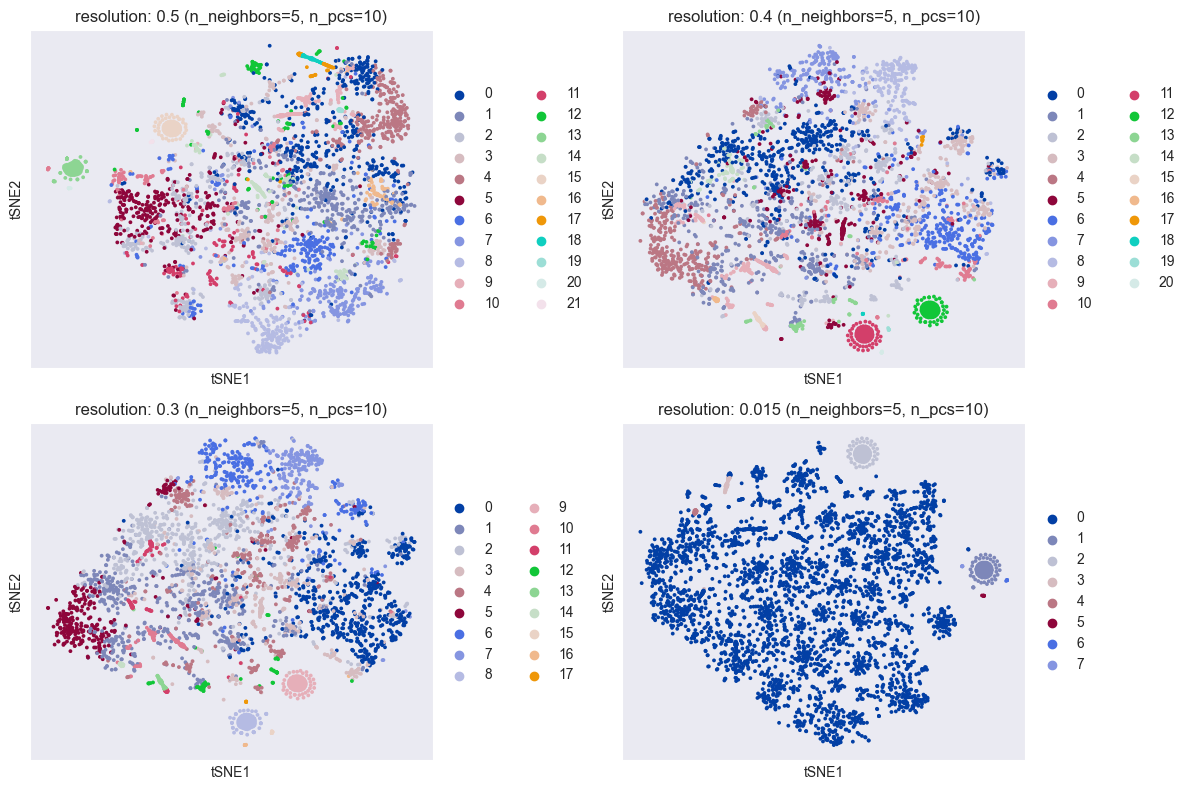

In [8]:
tuning_values = [0.5, 0.4, 0.3, 0.015]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.apply_tsne(all_noise, n_neighbors=5, n_pcs=10, resolution=value)
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"resolution: {value} (n_neighbors=5, n_pcs=10)",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

## 2. Check for pathway genes

Verify that the selected genes for the selected pathways exist in the datasest before proceeding to capturing the expression data for heatmap.

In [12]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False, genes_to_check=['CDC25C', 'CDK1', 'PLK1', 'AURKA', 'WEE1'])

2025-07-28 19:45:06,394 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...
2025-07-28 19:45:06,663 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:07,674 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:07,700 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:08,193 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1
2025-07-28 19:45:08,249 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:08,536 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:08,551 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:45:08,729 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:08,801 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:09,110 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CDC25C, CDK1, WEE1
2025-07-28 19:45:09,124 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:45:09,304 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:09,424 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:09,879 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CDC25C, CDK1, PLK1
2025-07-28 19:45:09,900 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:45:10,065 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:10,166 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:10,572 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1
2025-07-28 19:45:10,591 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:45:10,772 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:10,859 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:11,254 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CDC25C, PLK1, AURKA
2025-07-28 19:45:11,274 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:11,590 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:11,682 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:12,051 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:12,068 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:12,267 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1
2025-07-28 19:45:12,615 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:13,648 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1
2025-07-28 19:45:13,704 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:13,965 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:14,214 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:15,275 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:15,317 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:45:15,520 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:15,908 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:17,493 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:17,554 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:17,821 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:18,031 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:18,912 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDC25C, CDK1, PLK1, AURKA
2025-07-28 19:45:18,944 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:45:19,309 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) CDC25C, CDK1, PLK1, AURKA, WEE1
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


In [13]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False, genes_to_check=['CDK1', 'CCNA2', 'E2F1', 'E2F2'])

2025-07-28 19:46:08,808 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...
2025-07-28 19:46:08,881 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:09,540 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:09,567 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:09,747 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:09,773 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:10,046 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:10,059 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:10,235 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CDK1, CCNA2, E2F2
2025-07-28 19:46:10,263 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:10,564 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:10,579 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:10,756 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:10,804 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:11,249 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:11,268 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:11,448 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:11,487 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:12,159 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:12,179 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:12,347 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:12,383 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:12,750 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CCNA2, E2F1, E2F2
2025-07-28 19:46:12,767 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:12,955 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:12,994 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:13,367 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:13,384 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:13,580 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:13,718 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:14,742 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:14,799 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:15,068 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:15,185 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:16,175 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:16,210 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:16,419 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:16,599 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:18,133 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:18,193 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:18,444 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:18,537 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:46:19,282 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2
2025-07-28 19:46:19,314 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:46:19,492 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CDK1, CCNA2, E2F1, E2F2


Log normalizing dataset...
Filtering dataset to highly variable genes...


... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


In [14]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False, genes_to_check=['BRCA1', 'BRCA2', 'RAD51', 'ATM', 'CHEK2', 'XRCC1'])

2025-07-28 19:47:42,139 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...
2025-07-28 19:47:42,205 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:42,957 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, ATM, XRCC1
2025-07-28 19:47:42,988 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:43,170 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, CHEK2, XRCC1


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:43,195 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:43,479 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:43,492 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:43,662 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) BRCA2, RAD51, CHEK2, XRCC1
2025-07-28 19:47:43,688 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:44,018 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, CHEK2, XRCC1
2025-07-28 19:47:44,035 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:44,216 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:44,268 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:44,778 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:44,802 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:44,974 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:45,014 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:45,683 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:45,702 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:45,878 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, CHEK2, XRCC1
2025-07-28 19:47:45,914 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:46,285 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:46,301 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:46,478 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, CHEK2, XRCC1
2025-07-28 19:47:46,515 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:46,874 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:46,892 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:47,077 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:47,204 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:48,213 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:48,263 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:48,523 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:48,629 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:49,554 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:49,590 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:49,933 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:50,094 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:51,419 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:51,480 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:51,717 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:51,807 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:47:52,555 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) BRCA1, BRCA2, RAD51, ATM, CHEK2, XRCC1
2025-07-28 19:47:52,586 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (0) 
2025-07-28 19:47:52,757 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) BRCA1, BRCA2, RAD51, CHEK2, XRCC1


Log normalizing dataset...
Filtering dataset to highly variable genes...


... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical


In [16]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False, genes_to_check=['ATF6', 'XBP1', 'CHOP', 'GRP78', 'PERK', 'DDIT3', 'HSPA5', 'EIF2AK3'])

2025-07-28 19:49:53,088 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...
2025-07-28 19:49:53,158 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:53,795 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) ATF6, XBP1, CHOP, GRP78, PERK, EIF2AK3
2025-07-28 19:49:53,825 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:54,011 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) XBP1, CHOP, GRP78, PERK, DDIT3, EIF2AK3
2025-07-28 19:49:54,034 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:54,302 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:54,316 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:54,488 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, EIF2AK3
2025-07-28 19:49:54,517 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:54,829 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) ATF6, XBP1, CHOP, GRP78, PERK, HSPA5
2025-07-28 19:49:54,844 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:55,010 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) ATF6, CHOP, GRP78, PERK, DDIT3, EIF2AK3


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:55,060 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:55,505 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) ATF6, CHOP, GRP78, PERK
2025-07-28 19:49:55,524 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:55,700 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) CHOP, GRP78, PERK, EIF2AK3
2025-07-28 19:49:55,740 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:56,140 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, EIF2AK3
2025-07-28 19:49:56,156 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:56,597 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) XBP1, CHOP, GRP78, PERK, EIF2AK3
2025-07-28 19:49:56,635 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:57,008 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) ATF6, CHOP, GRP78, PERK
2025-07-28 19:49:57,024 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:57,200 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, DDIT3
2025-07-28 19:49:57,240 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:57,593 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, DDIT3
2025-07-28 19:49:57,610 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:49:57,799 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (7) ATF6, CHOP, GRP78, PERK, DDIT3, HSPA5, EIF2AK3


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:57,932 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:58,939 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) ATF6, CHOP, GRP78, PERK
2025-07-28 19:49:58,989 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:49:59,236 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (6) ATF6, CHOP, GRP78, PERK, HSPA5, EIF2AK3
2025-07-28 19:49:59,348 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:00,259 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) ATF6, CHOP, GRP78, PERK
2025-07-28 19:50:00,294 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK
2025-07-28 19:50:00,486 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) XBP1, CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:00,650 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:01,933 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (4) ATF6, CHOP, GRP78, PERK
2025-07-28 19:50:01,996 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:02,241 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, HSPA5
2025-07-28 19:50:02,336 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:03,134 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, XBP1, CHOP, GRP78, PERK
2025-07-28 19:50:03,164 [INFO] signals_in_the_noise.preprocessing.gse161529: [before annotation] Sanity check genes missing (3) CHOP, GRP78, PERK


Log normalizing dataset...
Filtering dataset to highly variable genes...


2025-07-28 19:50:03,536 [INFO] signals_in_the_noise.preprocessing.gse161529: [after stromal filter], sanity check genes missing (5) ATF6, CHOP, GRP78, PERK, EIF2AK3
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
